## This notebook will use dataset from Cardiac.csv to predict If the patient is under risk of Cardiac Arrest or not

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Cardiac.csv')

In [3]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


In [4]:
df.shape


(889, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.0,0.120360,0.325565,0.0,0.0,0.0,0.0,1.0
Consumes_other_tobacco_products,889.0,0.838020,0.368640,0.0,1.0,1.0,1.0,1.0
HighBP,889.0,0.086614,0.281427,0.0,0.0,0.0,0.0,1.0
Obese,889.0,0.919010,0.272973,0.0,1.0,1.0,1.0,1.0
Diabetes,889.0,0.055118,0.228339,0.0,0.0,0.0,0.0,1.0
Metabolic_syndrome,889.0,0.042745,0.202395,0.0,0.0,0.0,0.0,1.0
Use_of_stimulant_drugs,889.0,0.082115,0.274694,0.0,0.0,0.0,0.0,1.0
Family_history,889.0,0.925759,0.262310,0.0,1.0,1.0,1.0,1.0
History_of_preeclampsia,889.0,0.017998,0.133018,0.0,0.0,0.0,0.0,1.0
CABG_history,889.0,0.021372,0.144704,0.0,0.0,0.0,0.0,1.0


In [7]:
df['UnderRisk'].value_counts()

no     699
yes    190
Name: UnderRisk, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      607
Female    256
Other      26
Name: Gender, dtype: int64

### Convert target column 'UnderRisk' into integer as  1 & 0 number from object type

In [9]:
df['UnderRisk'] = df['UnderRisk'].map({'yes': 1, 'no': 0})
df['UnderRisk'] = df['UnderRisk'].astype('int')



### Analyze  the correlation between various columns using heatmap 

C:\Users\virup\AppData\Local\Temp\ipykernel_10444\1880869605.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")


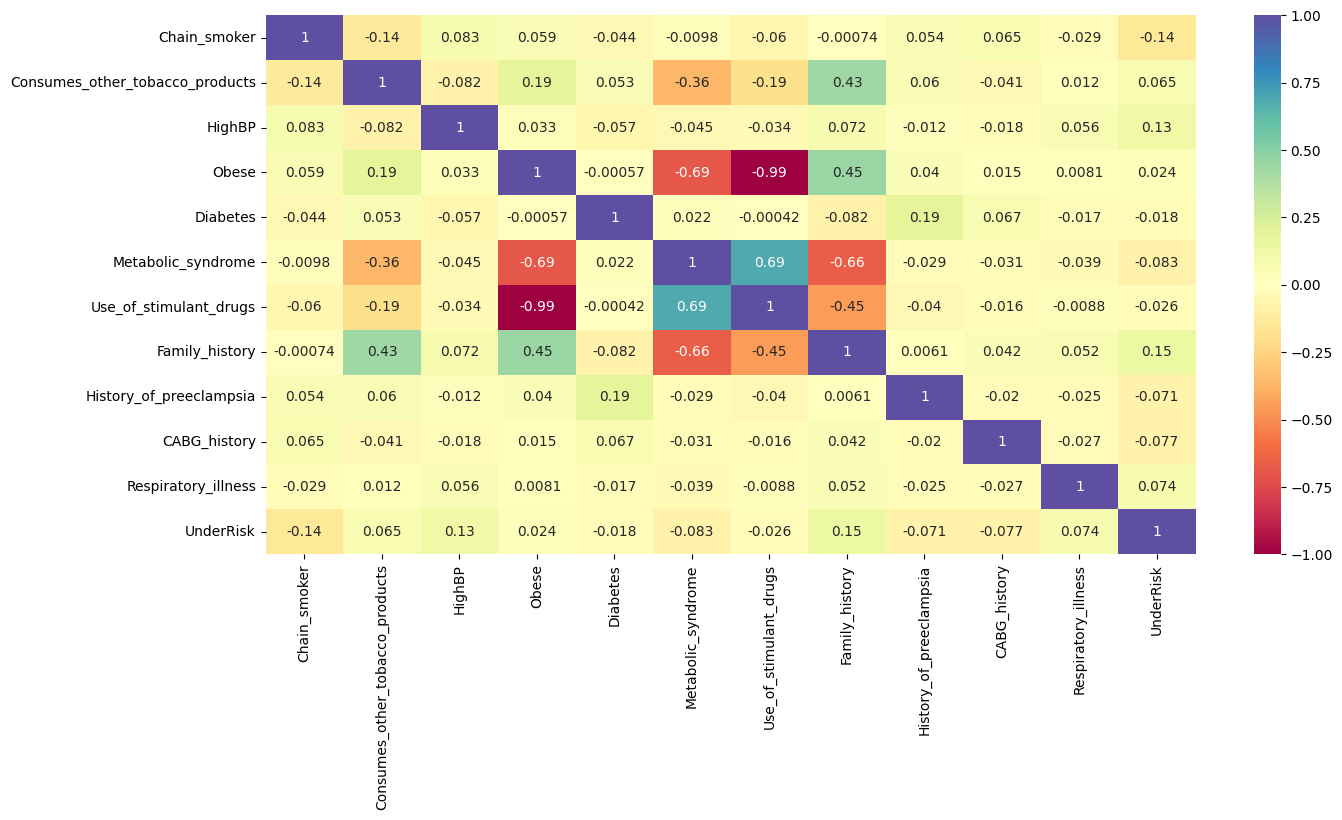

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Analyze the pairplot for various independent features , and target

In [11]:
#sns.pairplot(df, hue = 'UnderRisk' , diag_kind='hist')

In [12]:
df["Gender"] = df["Gender"].astype("category")

In [13]:
# Splitting data into training, validation and test set:
# separating the independent and dependent variables
X = df.drop(["UnderRisk"], axis=1)
y = df["UnderRisk"]


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Gender                           889 non-null    category
 1   Chain_smoker                     889 non-null    int64   
 2   Consumes_other_tobacco_products  889 non-null    int64   
 3   HighBP                           889 non-null    int64   
 4   Obese                            889 non-null    int64   
 5   Diabetes                         889 non-null    int64   
 6   Metabolic_syndrome               889 non-null    int64   
 7   Use_of_stimulant_drugs           889 non-null    int64   
 8   Family_history                   889 non-null    int64   
 9   History_of_preeclampsia          889 non-null    int64   
 10  CABG_history                     889 non-null    int64   
 11  Respiratory_illness              889 non-null    int64   
dtypes: categ

### Split training, validation and test data 

In [15]:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)


### Prepare the dummy data for categorical columns in train, test and validation set.

In [16]:
# creating dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
# creating dummy variables
X_test = pd.get_dummies(X_test, drop_first=True)
# creating dummy variables
X_val = pd.get_dummies(X_val, drop_first=True)


In [17]:
X_train.shape

(533, 13)

### Build Logistic Regression Model with default parameters

In [18]:
model1 = LogisticRegression(random_state=1)

# training the Logistic regression model with  training set
model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [19]:
pred_train = model1.predict(X_train)

In [20]:
# Checking recall score on oversampled train and validation set
print("Recall :", recall_score(y_train, pred_train))

Recall : 0.03508771929824561


In [21]:
print("Accuracy : ", accuracy_score(y_train, pred_train))

Accuracy :  0.7879924953095685


In [22]:
#execute following command from Anaconda prompt to install imblearn package
#!conda install -c conda-forge imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


### Prepare oversampling data by SMOTE

In [23]:
# To undersample and oversample the data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

### Train LogisticRegression Model on over sampleded training data

In [24]:
model2 = LogisticRegression(random_state=1)

# training the decision tree model with oversampled training set
model2.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [25]:
# Predicting the target for train and validation set
pred_train = model2.predict(X_train_over)

In [26]:
# Checking recall score on oversampled train and validation set
print("Recall using SMOTE :", recall_score(y_train_over, pred_train))
    

Recall using SMOTE : 0.766109785202864


In [27]:
print("Accuracy using SMOTE : ", accuracy_score(y_train_over, pred_train))


Accuracy using SMOTE :  0.6694510739856802


In [28]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Train BaggingClassifier Model with default params on over sampled training data

In [29]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_over,y_train_over)



BaggingClassifier(random_state=1)

In [30]:
#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Vaidation performance:\n",bagging_classifier_model_train_perf)

Vaidation performance:
    Accuracy    Recall  Precision        F1
0  0.567416  0.578947    0.26506  0.363636


### Train RandomForestClassifier Model with default params on normal training data

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.801126  0.175439      0.625  0.273973


In [32]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

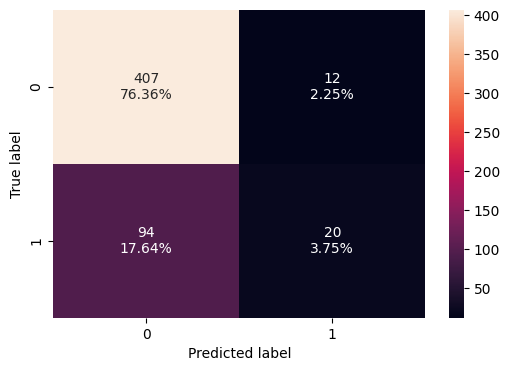

In [33]:
import numpy as np
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

### Train BaggingClassifier model using StratifiedKFold on oversampled data

In [34]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

models = []  # Empty list to store all the models

# Appending models into the list

models.append(("Bagging", BaggingClassifier(random_state=1)))

models.append(("Random forest", RandomForestClassifier(random_state=1)))

models.append(("LR", LogisticRegression(random_state=1)))

models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores

names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:

    scoring = "recall"

    kfold = StratifiedKFold(

        n_splits=5, shuffle=True, random_state=1

    )  # Setting number of splits equal to 5

    cv_result = cross_val_score(

        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold

    )

    results.append(cv_result)

    names.append(name)

    print("{}: {}".format(name, cv_result.mean() * 100))






Cross-Validation Performance:

Bagging: 76.84452094090648
Random forest: 77.08548479632817
LR: 76.13310384394723
dtree: 76.84452094090648


In [35]:
print (names)
print (results)

['Bagging', 'Random forest', 'LR', 'dtree']
[array([0.77380952, 0.80952381, 0.67857143, 0.74698795, 0.83333333]), array([0.77380952, 0.80952381, 0.67857143, 0.75903614, 0.83333333]), array([0.78571429, 0.75      , 0.69047619, 0.75903614, 0.82142857]), array([0.76190476, 0.80952381, 0.69047619, 0.74698795, 0.83333333])]


### Train Adaboost classifier using RandomizedSearchCV with DecisionTreeClassifier as estimator

In [36]:
param_grid = {

    "n_estimators": np.arange(10, 110, 10),

    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

    "estimator": [

        DecisionTreeClassifier(max_depth=1, random_state=1),

        DecisionTreeClassifier(max_depth=2, random_state=1),

        DecisionTreeClassifier(max_depth=3, random_state=1)

    ],

}

In [37]:
adaboostmodel = AdaBoostClassifier(random_state=1)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
scoring = "recall"
randomized_cv = RandomizedSearchCV(
    estimator=adaboostmodel,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scoring,
    cv=5,
    random_state=1,
)

# Fit RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)


C:\Users\virup\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [0.1, 0.01, 0.2, 0.05,
                                                          1],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=1, scoring='recall')

### Get the best params and best estimator from RandomizedSearchCV

In [39]:
best_params = randomized_cv.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = randomized_cv.best_estimator_



Best hyperparameters: {'n_estimators': 70, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}


In [40]:
feature_names = list(X.columns)
print (feature_names)


['Gender', 'Chain_smoker', 'Consumes_other_tobacco_products', 'HighBP', 'Obese', 'Diabetes', 'Metabolic_syndrome', 'Use_of_stimulant_drugs', 'Family_history', 'History_of_preeclampsia', 'CABG_history', 'Respiratory_illness']


### Train AdaBoost model using over sampled and under sampled data 

In [41]:
from imblearn.under_sampling import RandomUnderSampler


model_over = AdaBoostClassifier(random_state=1)

model_over.fit(X_train_over, y_train_over)

model_performance_classification_sklearn(model_over, X_train_over, y_train_over)




C:\Users\virup\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Recall,Precision,F1
0,0.665871,0.778043,0.635478,0.699571


### Adaboost Classifier with Undersampling data 

In [42]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)





In [43]:
# train the Adaboost model using under sampler data 
model_un = AdaBoostClassifier(random_state=1)
model_un.fit(X_train_un, y_train_un)

model_performance_classification_sklearn(model_un, X_train_un, y_train_un)

C:\Users\virup\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Recall,Precision,F1
0,0.70614,0.842105,0.662069,0.741313


### Check the feature importances for the adaboost model trained with with undersampling data

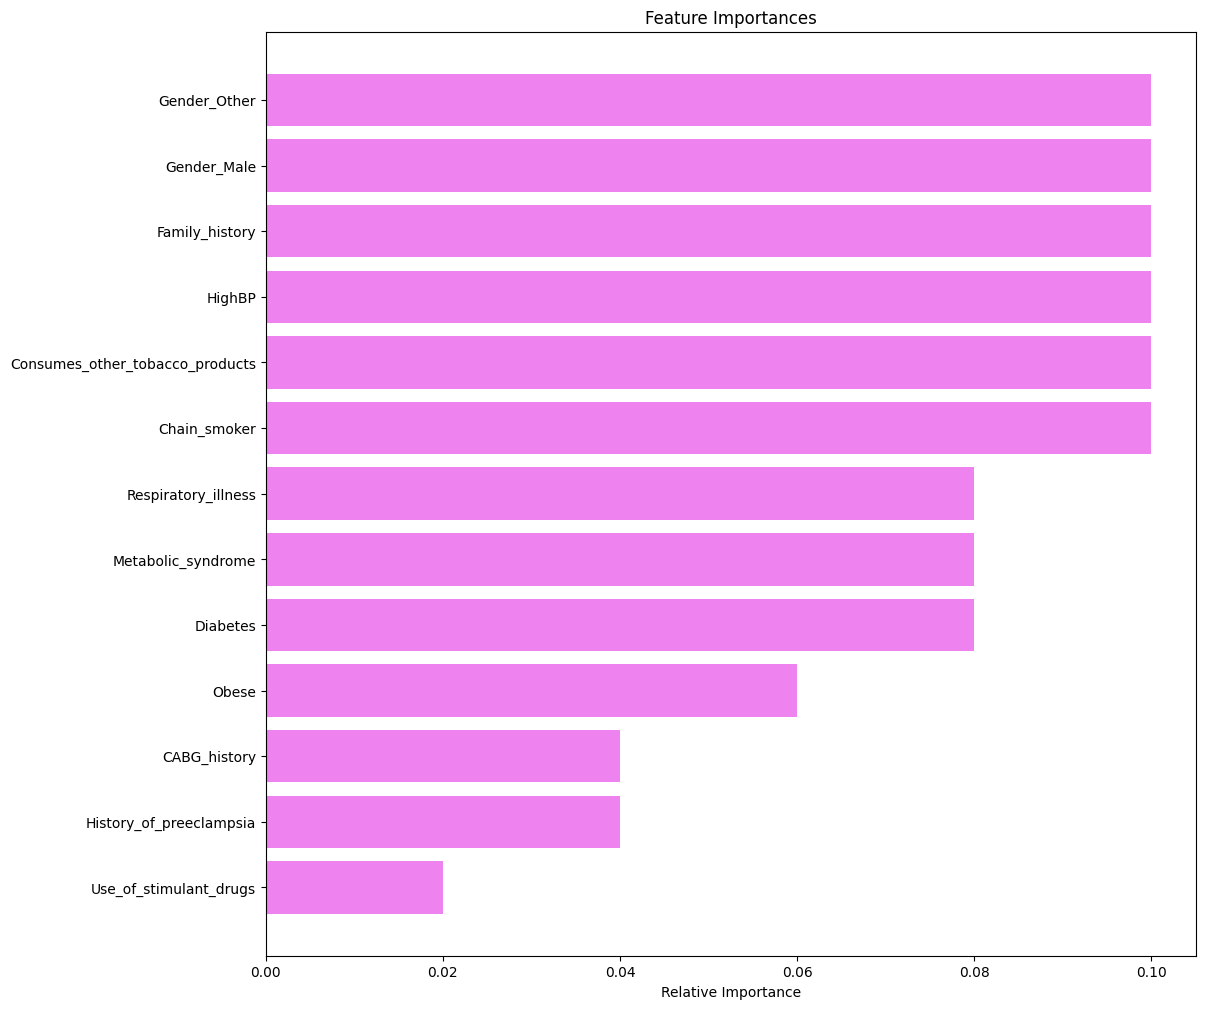

In [44]:
importances = model_un.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()